# Lab 5: RNAfold/plot and Using the Subprocess Module

## Grab Sequences from Penchovsky and Breaker 

Please copy down the sequences for the YES-1 riboswitch from Figure 2a, the NOT-1 riboswitch in Figure 4a, the AND-1riboswitch in Figure 5a, and the OR-1 riboswitch in Figure 6a.For each riboswitch, produce a table in your iPython notebook that contains the following information: 
 1. riboswitch name 
 2. start and end coordinates of OBS-1 (blue region) 
 3. start and end coordinates of OBS-2 (blue region, only applicable to AND-1 and OR-1) 
 4. start and end coordinates of the two red regions


YES-1: (Figure 2a)
seq:GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
OBS: 26-47
Red regions: 16-21, 49-54

NOT-1: (Figure 4a)
seq:GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
OBS: 44-66
Red regions: 40-43, 74-77

AND-1: (Figure 5a)
seq:GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGC GAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
OBS1: 30-45
OBS2: 49-64
Red regions: 16-23, 70-77

OR-1: (Figure 6a)
seq:GGGCGACCCCUGAUGGCUUGGUUGAGUAUUUACAGCUCCAUAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
OBS1: 27-46 
OBS2: 47-66
Red regions: 16-26, 67-77

## Now, write a routine to fold RNA: 

### Check that RNAfold works in Terminal
Trying it out in Terminal:

    be131-04@ip-172-30-0-167:~> cd Lab_5
    be131-04@ip-172-30-0-167:~/Lab_5> RNAfold

Terminal Returns: 
Input string (upper or lower case); @ to quit
....,....1....,....2....,....3....,....4....,....5....,....6....,....7....,....8

Pasted in the following sequence below the numbers: GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC@ - the at-sign (@) is needed to tell the software to stop

Terminal Returns: 
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC@
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))).
 minimum free energy = -33.80 kcal/mol

Input string (upper or lower case); @ to quit
....,....1....,....2....,....3....,....4....,....5....,....6....,....7....,....8

I fold a file called rna.ps in my Lab_5 directory

#### Find Secondary Structure for Gates when OBS not bound

In [1]:
import subprocess
seqs = \
""">seq1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>seq2
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
>seq3
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
>seq4
GGGCGACCCCUGAUGGCUUGGUUGAGUAUUUACAGCUCCAUAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>@
"""

p = subprocess.run('RNAfold', 
                   input= bytes(seqs, 'ascii'),
                   stdout= subprocess.PIPE,
                   stderr= subprocess.PIPE)

print("Terminal View")
print(p.stderr.decode())

print("Output File Contents")
print(p.stdout.decode())

Terminal View

Output File Contents
>seq1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)
>seq2
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)
>seq3
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)
>seq4
GGGCGACCCCUGAUGGCUUGGUUGAGUAUUUACAGCUCCAUAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.........))).))).)))...)).))))))..))))))....(((((....))))).)))))))) (-37.50)



#### Find Secondary Structure for Gates When OBS's bind

In terminal ran: 

    >cd Lab_5
    >cat con_gate.txt; RNAfold -C con_gate.txt
   

In [31]:
import subprocess

def cons_gen(name, seq, c1 , c2): 
    count= len(seq)
    end_count= count - (c1 + c2)
    f= open(name +'.txt', "w+")
    f.write(">" + name + "\n")
    f.close()
    
    a= open(name +'.txt', "a+")
    a.write(seq + "\n" + "."*c1 + "x"*c2 +"."*end_count)
    a.close()
    return print(open(name +'.txt', "r+").read())
def two_cons_gen(name, seq, c1 , c2, c3, c4): 
    count= len(seq)
    end_count= count - (c1 + c2 + c3 + c4)
    f= open(name +'.txt', "w+")
    f.write(">" + name + "\n")
    f.close()
    
    a= open(name +'.txt', "a+")
    a.write(seq + "\n" + "."*c1 + "x"*c2 + "."*c3 + "x"*c4 +"."*end_count)
    a.close()
    return print(open(name +'.txt', "r+").read())

#
seq1b= "GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"      
seq2b= "GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC"       


cons_gen("con_yes",seq2b, 25, 22)
cons_gen("con_not", seq2b, 43, 23)

seq3b = "GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU"
seq4b = "GGGCGACCCCUGAUGGCUUGGUUGAGUAUUUACAGCUCCAUAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"

two_cons_gen("con_and", seq3b, 29 , 16, 4, 16)
two_cons_gen("1con_and", seq3b, 29 , 16, 20, 0)
two_cons_gen("2con_and", seq3b, 45 , 0, 4, 16)


two_cons_gen("con_or", seq4b, 26 , 20, 0, 20)
two_cons_gen("1con_or", seq4b, 26 , 20, 20, 0)
two_cons_gen("2con_or", seq4b, 26 , 0, 20, 20)


>con_yes
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.........................xxxxxxxxxxxxxxxxxxxxxx.............................................
>con_not
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
...........................................xxxxxxxxxxxxxxxxxxxxxxx..........................
>con_and
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
.............................xxxxxxxxxxxxxxxx....xxxxxxxxxxxxxxxx...............................................
>1con_and
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
.............................xxxxxxxxxxxxxxxx...................................................................
>2con_and
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
................

## Results:  

### YES-1 Gate:

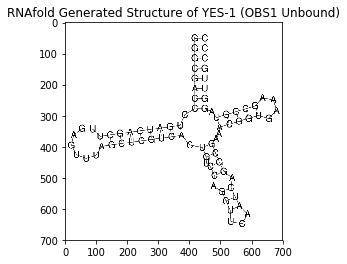

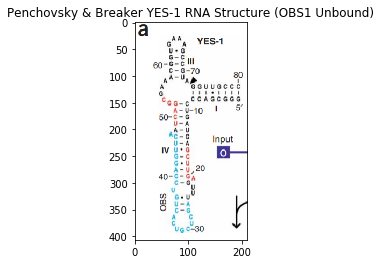

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# No constraints and unbound  
yes1_gen = mpimg.imread('seq1_ss.png')
yesgenplot = plt.imshow(yes1_gen)
yesgentitle = plt.title("RNAfold Generated Structure of YES-1 (OBS1 Unbound)")
plt.show()

# Penchovsky & Breaker Figure 2a
yes1 = mpimg.imread('YES_PAPER - Copy.PNG')
yes1plot = plt.imshow(yes1)
yes1title = plt.title("Penchovsky & Breaker YES-1 RNA Structure (OBS1 Unbound)")
plt.show()

# OBS binds 26-47   
yes1_gen_OBS1 = mpimg.imread('1obs_yes.png')
yes_gen_obs1_plot = plt.imshow(yes1_gen_OBS1)
yes_gen_obs1_title = plt.title("RNAfold Generated Structure of YES-1 (OBS1 Bound)")
plt.show()

# Penchovsky & Breaker Figure 1b
yes1_OBS1 = mpimg.imread('YES1_OBS1.png')
yes_obs1_plot = plt.imshow(yes1_OBS1)
yes_obs1_title = plt.title("Penchovsky & Breaker YES-1 RNA Structure (OBS1 Bound)")
plt.show()

Are they the same? Are they different? Are there any stem-loop structures that don’t match up?Whatmight explain the differences? See if you can track down the parameters the authors used and compare them to the default RNAfold parameters (e.g., temperature, algorithm, etc).Don’t kill yourself comparing every last base position to the paper, but do give us a general idea about the presence of stem-loops and whether the red regions have bound each other.

Now, fold YES-1 again with constraints and see what you get. Does it look like the self-cleaving form of YES-1 in Figure 2? Are the red regions bound to each other? Do the same for NOT-1.

### NOT-1 Gate:

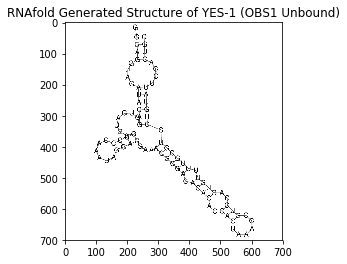

FileNotFoundError: [Errno 2] No such file or directory: 'NOT_PAPER.png'

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# No constraints  
not1_gen = mpimg.imread('seq2_ss.png')
notgenplot = plt.imshow(not1_gen)
notgentitle = plt.title("RNAfold Generated Structure of YES-1 (OBS1 Unbound)")
plt.show()

# Penchovsky & Breaker Figure 4a
not1 = mpimg.imread('NOT_PAPER.PNG')
not1plot = plt.imshow(yes1)
not1title = plt.title("Penchovsky & Breaker YES-1 RNA Structure (OBS1 Unbound)")
plt.show()

not1_gen_OBS1 = mpimg.imread('1obs_not.png')
not_gen_obs1_plot = plt.imshow(yes1_gen_OBS1)
not_gen_obs1_title = plt.title("RNAfold Generated Structure of YES-1 (OBS1 Bound)")
plt.show()

#not1_OBS1 = mpimg.imread('YES1_OBS1.png')
#not_obs1_plot = plt.imshow(not1_OBS1)
#not_obs1_title = plt.title("Penchovsky & Breaker YES-1 RNA Structure (OBS1 Bound)")
#plt.show()


Are they the same? Are they different? Are there any stem-loop structures that don’t match up?Whatmight explain the differences? See if you can track down the parameters the authors used and compare them to the default RNAfold parameters (e.g., temperature, algorithm, etc).Don’t kill yourself comparing every last base position to the paper, but do give us a general idea about the presence of stem-loops and whether the red regions have bound each other.

Now, fold YES-1 again with constraints and see what you get. Does it look like the self-cleaving form of YES-1 in Figure 2? Are the red regions bound to each other? Do the same for NOT-1.

### OR-1 Gate:

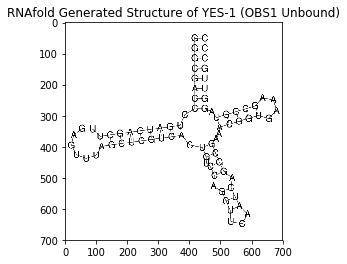

FileNotFoundError: [Errno 2] No such file or directory: 'YES-1.png'

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# No constraints  
or1_gen = mpimg.imread('seq3_ss.png')
yesgenplot = plt.imshow(or1_gen)
yesgentitle = plt.title("RNAfold Generated Structure of YES-1 (OBS1 Unbound)")
plt.show()

# Penchovsky & Breaker Figure 5a
or1 = mpimg.imread('OR_PAPER.PNG')
or1plot = plt.imshow(or1)
or1title = plt.title("Penchovsky & Breaker YES-1 RNA Structure (OBS1 Unbound)")
plt.show()

or1_gen_OBS1 = mpimg.imread('YES1_OBS1_gen.png')
or_gen_obs1_plot = plt.imshow(or1_gen_OBS1)
or_gen_obs1_title = plt.title("RNAfold Generated Structure of YES-1 (OBS1 Bound)")
plt.show()

or1_OBS1 = mpimg.imread('YES1_OBS1.png')
or_obs1_plot = plt.imshow(yes1_OBS1)
or_obs1_title = plt.title("Penchovsky & Breaker YES-1 RNA Structure (OBS1 Bound)")
plt.show()


Are they the same? Are they different? Are there any stem-loop structures that don’t match up?Whatmight explain the differences? See if you can track down the parameters the authors used and compare them to the default RNAfold parameters (e.g., temperature, algorithm, etc).Don’t kill yourself comparing every last base position to the paper, but do give us a general idea about the presence of stem-loops and whether the red regions have bound each other.

### AND-1 Gate:

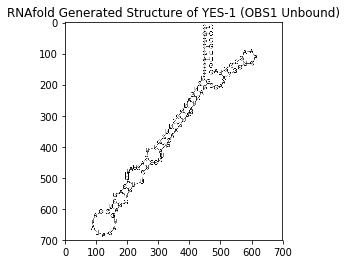

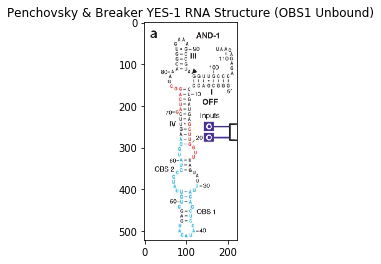

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# No constraints  
and1_gen = mpimg.imread('seq4_ss.png')
andgenplot = plt.imshow(and1_gen)
andgentitle = plt.title("RNAfold Generated Structure of YES-1 (OBS1 Unbound)")
plt.show()

# Penchovsky & Breaker Figure 6a
and1 = mpimg.imread('1AND_PAPER.PNG')
and1plot = plt.imshow(and1)
and1title = plt.title("Penchovsky & Breaker YES-1 RNA Structure (OBS1 Unbound)")
plt.show()

In [ ]:
and1_gen_OBS1 = mpimg.imread('AND_PAPER.png')
and_gen_obs1_plot = plt.imshow(and1_gen_OBS1)
and_gen_obs1_title = plt.title("RNAfold Generated Structure of YES-1 (OBS1 Bound)")
plt.show()

and1_OBS1 = mpimg.imread('YES1_OBS1.png')
and_obs1_plot = plt.imshow(and1_OBS1)
and_obs1_title = plt.title("Penchovsky & Breaker YES-1 RNA Structure (OBS1 Bound)")
plt.show()


Are they the same? Are they different? Are there any stem-loop structures that don’t match up?Whatmight explain the differences? See if you can track down the parameters the authors used and compare them to the default RNAfold parameters (e.g., temperature, algorithm, etc).Don’t kill yourself comparing every last base position to the paper, but do give us a general idea about the presence of stem-loops and whether the red regions have bound each other.

According to your results, do the AND-1 and OR-1 riboswitches work as the paperclaims?